<h2> 3.1 Reading data and basic stats </h2>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"G:\Machine Learning\Projects\Quora\Raw_data/train.csv")

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


<h3> 3.2.5 Checking for NULL values </h3>

In [5]:
## it means 2 features have NAN values
df.isnull().any().sum()

2

In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
# Filling the null values with ' '

In [8]:
df.fillna('',inplace=True)

##### Aftter doing some high level basic statistics lets do some basic Feature Engineering on data...

<h2>3.3 Basic Feature Extraction (before cleaning) </h2>

In [9]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

Let us now construct a few features like:

 - ____freq_qid1____ = Frequency of qid1's(number of times question 1 occurs)
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1 (string length of q1)
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 
  (if we have more common words , then there is a higher 
  
  likelihood that both que. will be common..)
  
  
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total) 
 
    u can think it as word_common=intersection & word_Total=union 
    
    (|Q1#Q2|/|Q1|+|Q2|) where #=intersection & Q1 & Q2 are sets & this is basicallly set representation...
    
    
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [10]:
### definitely all above features might not be useful , 
# but there are certain features that are more useful like word share

In [11]:
data=df.copy()

In [12]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### Frequency of qid's(let say number of times question 1 occurs)
    Features as freq_qid1 & freq_qid2
    

In [13]:
data['qid1'].head(20)

### ie how many times qid1 '1' appears in whole data
### ie how many times qid1 '3' appears in whole data
### ie how many times qid1 '5' appears in whole data
### ie how many times qid1 '7' appears in whole data

0      1
1      3
2      5
3      7
4      9
5     11
6     13
7     15
8     17
9     19
10    21
11    23
12    25
13    27
14    29
15    31
16    33
17    35
18    37
19    39
Name: qid1, dtype: int64

In [14]:
data.groupby('qid1')['qid1'].transform('count')

0          1
1          4
2          1
3          1
4          3
          ..
404285     2
404286    12
404287     1
404288     1
404289     1
Name: qid1, Length: 404290, dtype: int64

In [15]:
## wrong logic
##dict1=data.groupby('qid1').agg({'qid1':'count'}).to_dict()
##dict1=dict(data.groupby('qid1').agg({'qid1':'count'}))

In [16]:
data['freq_qid1']=data.groupby('qid1')['qid1'].transform('count') 
data['freq_qid2']=data.groupby('qid2')['qid2'].transform('count')

In [17]:
data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2'],
      dtype='object')

### Length of q1 & q2
     Features as q1len & q2len

In [18]:
## ie 66 characters in question1 of 0th index
len(data['question1'][0])

## it has 66 characters

66

In [19]:
data['q1len'] = data['question1'].str.len() 
## data['question1'].apply(len)

data['q2len'] = data['question2'].str.len()
## data['question2'].apply(len)


In [20]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39


### number of words in question 1 & question 2
    features as q1_n_words & q2_n_words

In [21]:
len(data['question1'][0].split(' '))

14

In [22]:
data['q1_n_words'] = data['question1'].apply\
                    (lambda row: len(row.split(" ")))
data['q2_n_words'] = data['question2'].apply\
                    (lambda row: len(row.split(" ")))

In [23]:
def count_length_of_text(text):
    return len(text.split(' '))

## data['question1'].apply(count_length_of_text)
## data['question2'].apply(count_length_of_text)

### create words_common feature..
    ie feature as words_common

    Create 2 sets s1 & s2 from ques q1 & q2 & find 
    commond words & calculate length of set which have all the common words..

In [24]:
data['question1'][0]

'What is the step by step guide to invest in share market in india?'

In [25]:
data['question2'][0]

'What is the step by step guide to invest in share market?'

In [26]:
data['question1'][0].split(' ')

['What',
 'is',
 'the',
 'step',
 'by',
 'step',
 'guide',
 'to',
 'invest',
 'in',
 'share',
 'market',
 'in',
 'india?']

In [27]:
## syntax : map(function,list), it means I have to apply
# function on each & evry elements of the list , 

## what this map will return us ? In Python 2 , 
# it will basically return us List but in Python 3 , it will return us Iterator

## so to acheive data in the form of set , 
# u have to use just set over here.. as set(map(function,list) )

## so to acheive data in the form of list , 
# u have to use just list over here... as  list(map(function,list))           

s1=set(map(lambda word:word.lower().strip(),data['question1'][0].split(' ')))
s1


{'by',
 'guide',
 'in',
 'india?',
 'invest',
 'is',
 'market',
 'share',
 'step',
 'the',
 'to',
 'what'}

In [28]:
len(s1)

12

In [29]:
def lower_case(word):
    word=word.lower()
    return word

list1=data['question1'][0].split(" ")
w1 = set(map(lower_case, list1))
len(w1)

12

In [30]:
s2=set(map(lambda word: word.lower().strip(),\
           data['question2'][0].split(' ')))
s2

{'by',
 'guide',
 'in',
 'invest',
 'is',
 'market?',
 'share',
 'step',
 'the',
 'to',
 'what'}

In [31]:
len(s2)

11

In [32]:
s1 & s2

{'by', 'guide', 'in', 'invest', 'is', 'share', 'step', 'the', 'to', 'what'}

In [33]:
## to get common words 
len(s1 & s2)

10

#### u have to do below operations for each & every row,so why not create a function for this

In [34]:
### define a function that will convert each & every word into lower-case
def lower_case(word):
    word=word.lower()
    return word

In [35]:
list1=data['question1'][0].split(" ")
list2=data['question2'][0].split(" ")
w1 = set(map(lower_case, list1))
w2 = set(map(lower_case, list2)) 
len(w1 & w2)

10

In [36]:
def word_Common(row):
    list1=row['question1'].split(" ")
    list2=row['question2'].split(" ")
    w1 = set(map(lower_case, list1))
    w2 = set(map(lower_case, list2))    
    return len(w1 & w2)

In [37]:
## takes around 1 min 

## apply this function to each row..axis=1> apply function to each row.

data['word_Common'] = data.apply(word_Common, axis=1)

### create word_Total  feature
    create feature as word_Total
    
    ie ,create 2 sets s1 & s2 from ques q1 & q2 , & \
        just add both sets & compute its length
    
    


In [38]:
list1=data['question1'][0].split(" ")
list2=data['question2'][0].split(" ")
w1 = set(map(lower_case, list1))
w2 = set(map(lower_case, list2))    
len(w1) + len(w2)

23

In [39]:
def word_Total(row):
    list1=row['question1'].split(" ")
    list2=row['question2'].split(" ")
    w1 = set(map(lower_case, list1))
    w2 = set(map(lower_case, list2))    
    return (len(w1) + len(w2))

In [40]:
data['word_Total'] = data.apply(word_Total, axis=1)

### Create word_share feature which is = > 
        word_common (ie intersection) / (word_Total)

In [41]:
list1=data['question1'][0].split(" ")
list2=data['question2'][0].split(" ")
w1 = set(map(lower_case, list1))
w2 = set(map(lower_case, list2))    
len(w1 & w2)/(len(w1) + len(w2))

0.43478260869565216

In [42]:
def word_share(row):
    list1=row['question1'].split(" ")
    list2=row['question2'].split(" ")
    w1 = set(map(lower_case, list1))
    w2 = set(map(lower_case, list2))    
    return 1.0 * len(w1 & w2)/(len(w1)+len(w2))

In [43]:
data['word_share'] = data.apply(word_share, axis=1)

## data['word_share']=data['word_Common']/data['word_Total']

In [44]:
data.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,20,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,24,0.166667


In [45]:
data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share'],
      dtype='object')

### Create (freq_q1+freq_q2) &  (freq_q1-freq_q2)

In [46]:
data['freq_q1+q2'] = data['freq_qid1'] + data['freq_qid2']
data['freq_q1-q2'] = abs(data['freq_qid1'] - data['freq_qid2'])

In [49]:
data.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,20,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,24,0.166667,2,0


In [50]:
### takes 3 mins
data.to_csv(r'G:\Machine Learning\Projects\Quora\Basic_fe/data_feature_extraction.csv',index=False)

## ie store as data_feature_extraction.csv in basic_fe folder..

In [51]:
data.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,20,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,24,0.166667,2,0


In [52]:
### whenever u see a real-world problem dont directly jump into solution , pause the video , try to ask yourself what should be
## best business metric over here if u are designing the solution  , think about a like a interview problem 
## what type of analysis we should do on data , what type of models mmakes sense ? what types of models dont makes sense , try to
## answer all these questions before watching rest of the videos , that way u will improve your skills
## if your answer is different from my answer then think , is way of approaching problem is good?
## if u are unable to think , let me know ASAP in comment section I will respond to it !
## that way u are solving a problem as a real world problem or a interview problem !
## try to go through with Kaggle & read discussion over there , see as a ML engineer It is impossible to good in Every domain
## in discussion , u will find some amazing solutions..

In [53]:
'''
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

'''

'\nif os.path.isfile(\'df_fe_without_preprocessing_train.csv\'):\n    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding=\'latin-1\')\nelse:\n    df[\'freq_qid1\'] = df.groupby(\'qid1\')[\'qid1\'].transform(\'count\') \n    df[\'freq_qid2\'] = df.groupby(\'qid2\')[\'qid2\'].transform(\'count\')\n    df[\'q1len\'] = df[\'question1\'].str.len() \n    df[\'q2len\'] = df[\'question2\'].str.len()\n    df[\'q1_n_words\'] = df[\'question1\'].apply(lambda row: len(row.split(" ")))\n    df[\'q2_n_words\'] = df[\'question2\'].apply(lambda row: len(row.split(" ")))\n\n    def normalized_word_Common(row):\n        w1 = set(map(lambda word: word.lower().strip(), row[\'question1\'].split(" ")))\n        w2 = set(map(lambda word: word.lower().strip(), row[\'question2\'].split(" ")))    \n        return 1.0 * len(w1 & w2)\n    df[\'word_Common\'] = df.apply(normalized_word_Common, axis=1)\n\n    def normalized_word_Total(row):\n        w1 = set(map(lambda word: word.lower().strip(), row

### Basic Analysis of some of the extracted features 

- Here are some questions have only one single words.

In [54]:
print ("Minimum length of the questions in question1 :"\
       , data['q1_n_words'].min())

print ("Minimum length of the questions in question2 :"\
       , data['q2_n_words'].min())

print ("Number of Questions with minimum length [question1]:\
        ", len(data[data['q1_n_words']== 1]))
print ("Number of Questions with minimum length [question2]\
        : ", len(data[data['q2_n_words']== 1]))

Minimum length of the questions in question1 : 1
Minimum length of the questions in question2 : 1
Number of Questions with minimum length [question1]:         67
Number of Questions with minimum length [question2]        :  24


In [55]:
data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

### Analysing distribution of length of each questions¶

(array([2.66061e+05, 1.20121e+05, 1.66690e+04, 1.12800e+03, 2.83000e+02,
        2.40000e+01, 3.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0. ,  62.3, 124.6, 186.9, 249.2, 311.5, 373.8, 436.1, 498.4,
        560.7, 623. ]),
 <BarContainer object of 10 artists>)

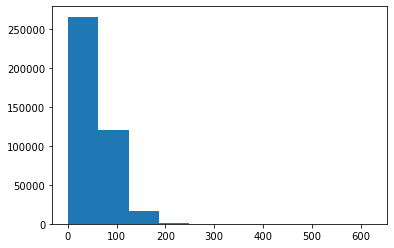

In [56]:
plt.hist(data['q1len'])

In [57]:
#### lets assign range=200 to make it more user friendly 

(array([1.000e+00, 1.900e+01, 8.000e+00, 6.000e+00, 1.000e+01, 1.100e+01,
        2.000e+00, 1.100e+01, 7.000e+00, 7.000e+00, 1.300e+01, 3.600e+01,
        1.140e+02, 1.980e+02, 2.710e+02, 3.330e+02, 5.050e+02, 6.740e+02,
        8.720e+02, 1.177e+03, 1.412e+03, 1.743e+03, 1.993e+03, 2.313e+03,
        2.731e+03, 3.009e+03, 3.637e+03, 3.938e+03, 4.462e+03, 4.676e+03,
        5.356e+03, 5.628e+03, 6.259e+03, 6.604e+03, 6.638e+03, 7.070e+03,
        7.245e+03, 7.909e+03, 8.171e+03, 8.023e+03, 8.008e+03, 8.109e+03,
        8.428e+03, 8.330e+03, 8.517e+03, 8.550e+03, 8.065e+03, 8.172e+03,
        7.952e+03, 7.900e+03, 7.682e+03, 7.310e+03, 7.025e+03, 7.141e+03,
        6.786e+03, 6.167e+03, 6.139e+03, 6.114e+03, 5.631e+03, 5.572e+03,
        5.424e+03, 5.107e+03, 4.840e+03, 4.744e+03, 4.427e+03, 4.313e+03,
        4.077e+03, 4.137e+03, 3.835e+03, 3.615e+03, 3.707e+03, 3.512e+03,
        3.220e+03, 3.186e+03, 3.222e+03, 2.836e+03, 2.883e+03, 2.863e+03,
        2.834e+03, 2.732e+03, 2.449e+0

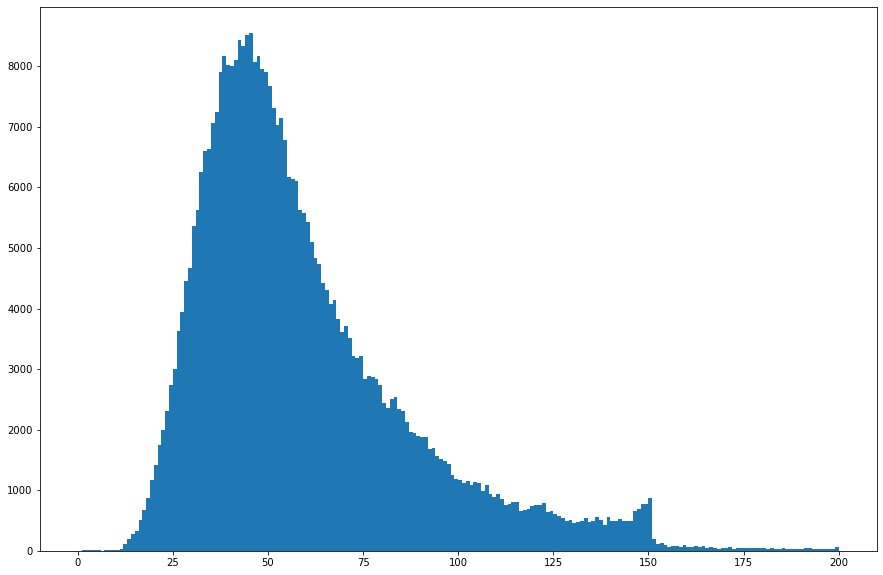

In [58]:
### create a bins of 200
### If *bins* is an integer,it defines the number of equal-width
# bins in the range...

plt.figure(figsize=(15, 10))
plt.hist(data['q1len'],range=[0,200],bins=200)

In [59]:
###We can see that most ques. have anywhere from 15 to 150 characters in them

### Analysing distribution of numbers of words in each questions

(array([3.11793e+05, 8.25470e+04, 9.08000e+03, 6.80000e+02, 1.62000e+02,
        2.50000e+01, 2.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  1. ,  13.4,  25.8,  38.2,  50.6,  63. ,  75.4,  87.8, 100.2,
        112.6, 125. ]),
 <BarContainer object of 10 artists>)

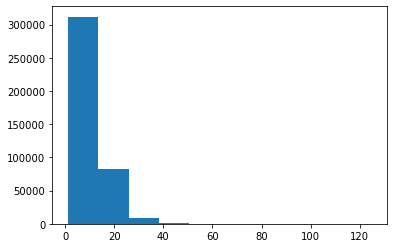

In [60]:
plt.hist(data['q1_n_words'])

(array([ 13205., 185821., 129245.,  45247.,  18573.,   8417.,   2310.,
           705.,    356.,    221.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <BarContainer object of 10 artists>)

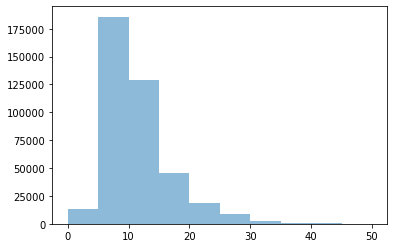

In [61]:
## alpha to play with colour of histogram

plt.hist(data['q1_n_words'],range=[0,50],alpha=0.5)

(array([0.0000e+00, 6.7000e+01, 7.3000e+01, 3.3310e+03, 9.7340e+03,
        1.8753e+04, 3.0940e+04, 4.3053e+04, 4.7606e+04, 4.5469e+04,
        3.9478e+04, 3.0019e+04, 2.4381e+04, 1.8889e+04, 1.6478e+04,
        1.3424e+04, 1.0880e+04, 8.3860e+03, 6.7990e+03, 5.7580e+03,
        5.0360e+03, 4.2730e+03, 3.7360e+03, 2.9130e+03, 2.6150e+03,
        2.2490e+03, 2.0640e+03, 1.6420e+03, 1.4440e+03, 1.0180e+03,
        8.0600e+02, 5.4300e+02, 4.1800e+02, 3.1000e+02, 2.3300e+02,
        1.8900e+02, 1.4100e+02, 1.4700e+02, 1.2500e+02, 1.0300e+02,
        9.2000e+01, 7.1000e+01, 8.5000e+01, 7.1000e+01, 3.7000e+01,
        5.2000e+01, 4.1000e+01, 2.9000e+01, 2.8000e+01, 7.1000e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <BarContainer object of 50 a

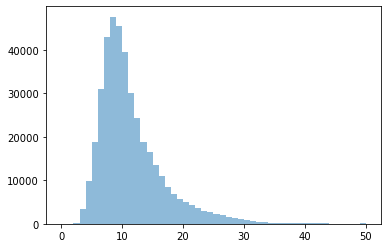

In [62]:
## alpha to play with colour of histogram

plt.hist(data['q1_n_words'],range=[0,50],alpha=0.5,bins=50)

In [63]:
### Conclusions-->> We see a similar distribution for word count,
# with most questions being about 5 - 15 words long.

### Analysing distribution of Feature: word_share 

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


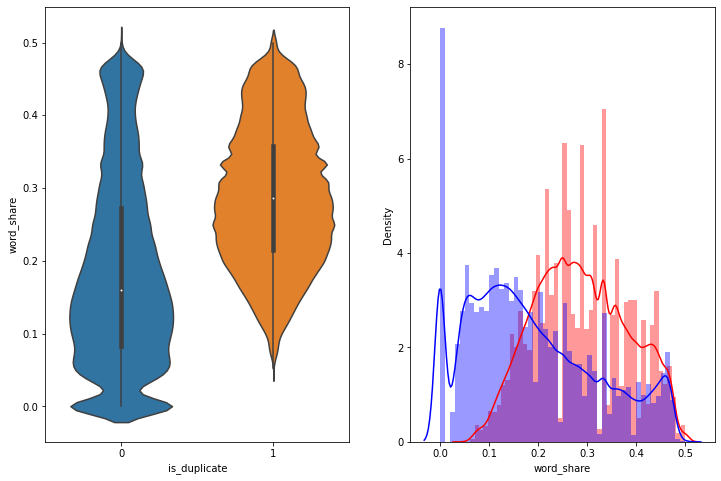

In [64]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data =data)

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1]['word_share'],color = 'red')
sns.distplot(data[data['is_duplicate'] == 0]['word_share'],color = 'blue')
plt.show()

In [65]:
### blue curve is a distribution of data pt..of word share 
# where class label is 0

### red curve is a distribution of data pt..of word share 
# where class label is 1

_ from the above distribution , we will clearly see there is more word share when we have (is_duplicate==1)..

In [66]:
## so if distribition of features are fully seperate , 
# then it is a best case  & this feature is brialliant as 
# it is separating both of the classes..


## then I can set this as threshold & I will say anything
# which is below than this , I will consider it as class 0 
# & greater than this , I will consider than it as class 1

## but if distribition of features are highly overlapped , 
# then it  is a worst case

## but if we have distribution that is fully seperated as well as 
# that is not fully overlapped , thats a average case  , 
# it means this feature is neither perfect nor bad ,it is somehwhere useful..

### Analysing distribution of Feature: word_common

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


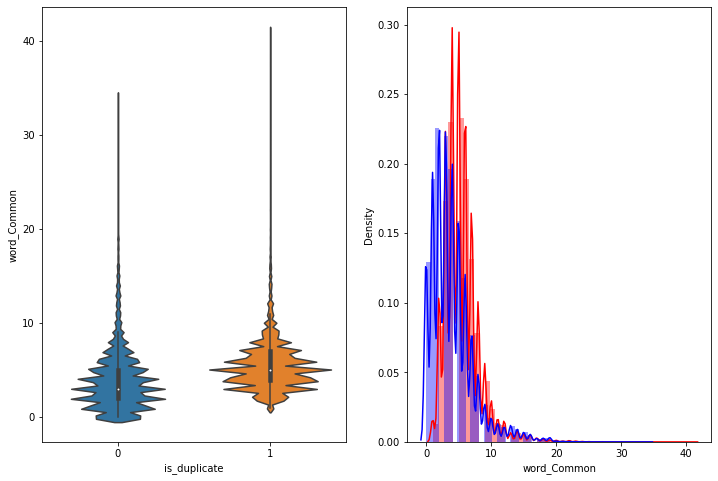

In [67]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.violinplot(x ='is_duplicate',y ='word_Common',data=data)

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1]['word_Common'],color='red')
sns.distplot(data[data['is_duplicate'] == 0]['word_Common'],color='blue')
plt.show()

In [68]:
### it is harder to analyse this as dist.. of both are highly overlapped
## but from boxplot we can infer some basic statistics..

In [69]:
## so in ML & data Science,u have to experiment with lots of features like this ... 

<p> The distributions of the word_Common feature in similar and non-similar questions are highly overlapping </p>